### Se trata de explorar con estos datos las tecnicas de clasificacion mediante un Arbol de Decision

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Load the Breast Cancer dataset


### Select the dataset

In [5]:
import kagglehub
import os

In [10]:
# To check the Kaggle Databases Guide check the page: https://www.kaggle.com/datasets 
#path = kagglehub.dataset_download("infamouscoder/dataset-netflix-shows")
path=kagglehub.dataset_download('bricevergnou/spotify-recommendation')
#path=kagglehub.dataset_download("stealthtechnologies/predict-student-performance-dataset", path='data.csv')
#print(os.listdir(path))

In [11]:
aux = [name for name in os.listdir(path) if ".csv" in name][0]
path = os.path.join(path,aux)
data =  pd.read_csv(path)

In [12]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [15]:
#bricevergnou/spotify-recommendation
y = data['liked']  # Columna 'class' como variable objetivo
X = data.drop('liked', axis=1)  # Eliminar la columna 'class' del resto de los datos

In [16]:
# Representacion numerica de los valores categoricos
#encoder = LabelEncoder()
# Codificar todas las columnas categóricas 
#X = X.apply(encoder.fit_transform)

In [17]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4


## Split the dataset into training and testing sets.

In [19]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the Decision Tree model.

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create a list of k values for KNN
crit = ["gini", "entropy"]#, "log_loss"]
maxdepth = range(1,30,2)
results = {}

for criterion in crit:
    print("criterion ", criterion)
    for max_depth in maxdepth:
        print("max_depth ",max_depth)
        classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[(criterion, max_depth)] = {
            'model': classifier,
            'accuracy': accuracy,
        }


criterion  gini
max_depth  1
max_depth  3
max_depth  5
max_depth  7
max_depth  9
max_depth  11
max_depth  13
max_depth  15
max_depth  17
max_depth  19
max_depth  21
max_depth  23
max_depth  25
max_depth  27
max_depth  29
criterion  entropy
max_depth  1
max_depth  3
max_depth  5
max_depth  7
max_depth  9
max_depth  11
max_depth  13
max_depth  15
max_depth  17
max_depth  19
max_depth  21
max_depth  23
max_depth  25
max_depth  27
max_depth  29


## Print the results of the classification.

In [24]:
# Print the results of the classification
print("Results of Decision Tree Classification:")
for (criterion, max_depth), result in results.items():
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Accuracy: {result['accuracy']:.2f}")


Results of Decision Tree Classification:
Criterion: gini, Max Depth: 1, Accuracy: 0.82
Criterion: gini, Max Depth: 3, Accuracy: 0.87
Criterion: gini, Max Depth: 5, Accuracy: 0.87
Criterion: gini, Max Depth: 7, Accuracy: 0.87
Criterion: gini, Max Depth: 9, Accuracy: 0.87
Criterion: gini, Max Depth: 11, Accuracy: 0.90
Criterion: gini, Max Depth: 13, Accuracy: 0.85
Criterion: gini, Max Depth: 15, Accuracy: 0.85
Criterion: gini, Max Depth: 17, Accuracy: 0.87
Criterion: gini, Max Depth: 19, Accuracy: 0.87
Criterion: gini, Max Depth: 21, Accuracy: 0.87
Criterion: gini, Max Depth: 23, Accuracy: 0.87
Criterion: gini, Max Depth: 25, Accuracy: 0.85
Criterion: gini, Max Depth: 27, Accuracy: 0.85
Criterion: gini, Max Depth: 29, Accuracy: 0.90
Criterion: entropy, Max Depth: 1, Accuracy: 0.82
Criterion: entropy, Max Depth: 3, Accuracy: 0.85
Criterion: entropy, Max Depth: 5, Accuracy: 0.82
Criterion: entropy, Max Depth: 7, Accuracy: 0.82
Criterion: entropy, Max Depth: 9, Accuracy: 0.82
Criterion: ent

## Visualize the prediction results

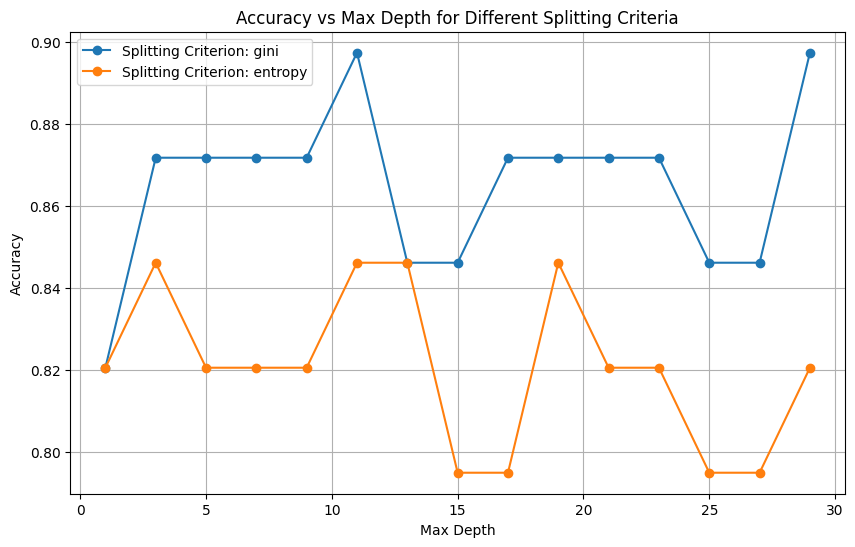

In [25]:
# Visualize the accuracy vs max depth for each splitting criterion
plt.figure(figsize=(10, 6))
for criterion in crit:
    accuracies = [result['accuracy'] for (c, md), result in results.items() if c == criterion]
    plt.plot(maxdepth, accuracies, marker='o', label=f'Splitting Criterion: {criterion}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Splitting Criteria')
plt.legend()
plt.grid(True)
plt.show()